In [ ]:
# RNN 연속적인 모델에 대해서 (순서가 중요한 의미가 있는 것에 대해서)

In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

# simple RNN

In [3]:
# 7.1 SimpleRNN 레이어 생성 코드
rnn1 = tf.keras.layers.SimpleRNN(units=1, activation='tanh', return_sequences=True)

In [4]:
# 7.2 시퀀스 예측 데이터 생성
X = []
Y = []
for i in range(6):
    # [0,1,2,3], [1,2,3,4] 같은 정수의 시퀀스를 만듭니다.
    lst = list(range(i,i+4))

    # 위에서 구한 시퀀스의 숫자들을 각각 10으로 나눈 다음 저장합니다.
    # SimpleRNN 에 각 타임스텝에 하나씩 숫자가 들어가기 때문에 여기서도 하나씩 분리해서 배열에 저장합니다.
    X.append(list(map(lambda c: [c/10], lst)))

    # 정답에 해당하는 4, 5 등의 정수를 역시 위처럼 10으로 나눠서 저장합니다.
    Y.append((i+4)/10)
    
X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [5]:
# 7.3 시퀀스 예측 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 7.4 네트워크 훈련 및 결과 확인
model.fit(X, Y, epochs=100, verbose=0)
print(model.predict(X))

[[0.3661785 ]
 [0.5144526 ]
 [0.63364637]
 [0.72563934]
 [0.79586726]
 [0.8500687 ]]


In [7]:
print(model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]])))
print(model.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]])))

[[0.89282656]]
[[0.1944763]]


# LSTM

In [8]:
# 7.6 곱셈 문제 데이터 생성
X = []
Y = []
for i in range(3000):
    # 0~1 사이의 랜덤한 숫자 100 개를 만듭니다.
    lst = np.random.rand(100)
    # 마킹할 숫자 2개의 인덱스를 뽑습니다.
    idx = np.random.choice(100, 2, replace=False)
    # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다.
    zeros = np.zeros(100)
    zeros[idx] = 1
    # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X 에 저장합니다.
    X.append(np.array(list(zip(zeros, lst))))
    # 마킹 인덱스가 1인 값들만 서로 곱해서 Y 에 저장합니다.
    Y.append(np.prod(lst[idx]))
    
print(X[0], Y[0])

[[0.         0.15334877]
 [0.         0.68605668]
 [0.         0.67071392]
 [0.         0.64398222]
 [0.         0.14606144]
 [0.         0.04437932]
 [0.         0.55936036]
 [0.         0.44319618]
 [0.         0.58046191]
 [0.         0.54430209]
 [0.         0.67122783]
 [0.         0.68959335]
 [0.         0.46210434]
 [0.         0.61680516]
 [0.         0.3351237 ]
 [0.         0.52221067]
 [0.         0.44471226]
 [0.         0.08260232]
 [0.         0.6712957 ]
 [0.         0.14544137]
 [0.         0.0374196 ]
 [0.         0.51519968]
 [0.         0.45993091]
 [0.         0.98443676]
 [0.         0.07947722]
 [0.         0.19023187]
 [0.         0.11614755]
 [0.         0.41951243]
 [0.         0.38964867]
 [0.         0.75538911]
 [0.         0.19345257]
 [0.         0.52533776]
 [0.         0.04453195]
 [0.         0.35369856]
 [0.         0.65169496]
 [0.         0.57936639]
 [0.         0.33316773]
 [0.         0.23736706]
 [0.         0.5047529 ]
 [0.         0.1114845 ]


In [10]:
# 7.7 SimpleRNN 레이어를 사용한 곱셈 문제 모델 정의 --> 실질적으로는 위로 많이 쌓지는 않음;;;;
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 7.8 SimpleRNN 네트워크 학습
X = np.array(X)
Y = np.array(Y)
# 2560개의 데이터만 학습시킵니다. validation 데이터는 20% 로 지정합니다.
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 4s 2ms/sample - loss: 0.0707 - val_loss: 0.0512
Epoch 2/100
2048/2048 [==============================] - 2s 834us/sample - loss: 0.0535 - val_loss: 0.0517
Epoch 3/100
2048/2048 [==============================] - 2s 884us/sample - loss: 0.0518 - val_loss: 0.0507
Epoch 4/100
2048/2048 [==============================] - 2s 834us/sample - loss: 0.0517 - val_loss: 0.0519
Epoch 5/100
2048/2048 [==============================] - 2s 813us/sample - loss: 0.0523 - val_loss: 0.0524
Epoch 6/100
2048/2048 [==============================] - 2s 855us/sample - loss: 0.0514 - val_loss: 0.0514
Epoch 7/100
2048/2048 [==============================] - 2s 840us/sample - loss: 0.0532 - val_loss: 0.0505
Epoch 8/100
2048/2048 [==============================] - 2s 848us/sample - loss: 0.0525 - val_loss: 0.0514
Epoch 9/100
2048/2048 [==============================] - 2s 860us/sample - loss: 0.0520 - val_loss:

2048/2048 [==============================] - 2s 938us/sample - loss: 0.0430 - val_loss: 0.0520
Epoch 77/100
2048/2048 [==============================] - 2s 894us/sample - loss: 0.0428 - val_loss: 0.0530
Epoch 78/100
2048/2048 [==============================] - 2s 943us/sample - loss: 0.0426 - val_loss: 0.0526
Epoch 79/100
2048/2048 [==============================] - 2s 956us/sample - loss: 0.0415 - val_loss: 0.0560
Epoch 80/100
2048/2048 [==============================] - 2s 931us/sample - loss: 0.0452 - val_loss: 0.0531
Epoch 81/100
2048/2048 [==============================] - 2s 920us/sample - loss: 0.0431 - val_loss: 0.0535
Epoch 82/100
2048/2048 [==============================] - 2s 957us/sample - loss: 0.0426 - val_loss: 0.0529
Epoch 83/100
2048/2048 [==============================] - 2s 940us/sample - loss: 0.0425 - val_loss: 0.0548
Epoch 84/100
2048/2048 [==============================] - 2s 918us/sample - loss: 0.0411 - val_loss: 0.0560
Epoch 85/100
2048/2048 [=================

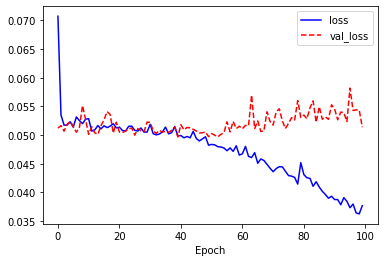

In [14]:
# 7.9 SimpleRNN 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
# 7.10 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

440/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.07839510226758394 	 0.30565143 	diff: 0.22725632404772367
0.8303927281041863 	 0.3922586 	diff: 0.4381341138025048
0.07150837353250081 	 0.29550138 	diff: 0.22399300762632793
0.2140038693175733 	 0.2523222 	diff: 0.03831832764287593
0.7236034178656949 	 0.21552086 	diff: 0.5080825591010465
correctness: 11.818181818181818 %


In [16]:
# 7.11 LSTM 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 7.12 LSTM 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 10s 5ms/sample - loss: 0.0610 - val_loss: 0.0513
Epoch 2/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0506 - val_loss: 0.0506
Epoch 3/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0505 - val_loss: 0.0507
Epoch 4/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0505 - val_loss: 0.0510
Epoch 5/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 0.0503 - val_loss: 0.0509
Epoch 6/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0506 - val_loss: 0.0504
Epoch 7/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0507 - val_loss: 0.0514
Epoch 8/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0504 - val_loss: 0.0509
Epoch 9/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0504 - val_loss: 0.0503
Epoch 1

2048/2048 [==============================] - 8s 4ms/sample - loss: 5.0661e-04 - val_loss: 4.0081e-04
Epoch 78/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 4.7228e-04 - val_loss: 6.6214e-04
Epoch 79/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 8.4303e-04 - val_loss: 0.0011
Epoch 80/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 8.4736e-04 - val_loss: 6.5562e-04
Epoch 81/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 5.5879e-04 - val_loss: 3.8870e-04
Epoch 82/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 5.1397e-04 - val_loss: 3.7000e-04
Epoch 83/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 4.3655e-04 - val_loss: 3.6342e-04
Epoch 84/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 4.5102e-04 - val_loss: 5.9263e-04
Epoch 85/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 6.2133e-04 - val_loss: 4.

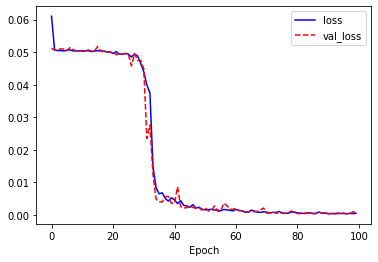

In [18]:
# 7.13 LSTM 네트워크 학습 결과 확인
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
# 7.14 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

440/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.07839510226758394 	 0.07004335 	diff: 0.008351754491647809
0.8303927281041863 	 0.7728534 	diff: 0.05753935362298512
0.07150837353250081 	 0.055468537 	diff: 0.01603983661910588
0.2140038693175733 	 0.19325161 	diff: 0.020752259515327193
0.7236034178656949 	 0.6611654 	diff: 0.06243800162500279
correctness: 82.27272727272728 %


# GRU Layer

In [20]:
# 7.15 GRU 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 7.16 GRU 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Train on 2048 samples, validate on 512 samples
Epoch 1/100
2048/2048 [==============================] - 13s 6ms/sample - loss: 0.0531 - val_loss: 0.0532
Epoch 2/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 0.0513 - val_loss: 0.0506
Epoch 3/100
2048/2048 [==============================] - 5s 3ms/sample - loss: 0.0509 - val_loss: 0.0504
Epoch 4/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0509 - val_loss: 0.0538
Epoch 5/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0505 - val_loss: 0.0504
Epoch 6/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0509 - val_loss: 0.0524
Epoch 7/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 0.0506 - val_loss: 0.0501
Epoch 8/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 0.0503 - val_loss: 0.0513
Epoch 9/100
2048/2048 [==============================] - 6s 3ms/sample - loss: 0.0503 - val_loss: 0.0509
Epoch 1

Epoch 75/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 3.0178e-04 - val_loss: 6.8414e-04
Epoch 76/100
2048/2048 [==============================] - 7s 4ms/sample - loss: 3.5786e-04 - val_loss: 3.5172e-04
Epoch 77/100
2048/2048 [==============================] - 9s 4ms/sample - loss: 2.8230e-04 - val_loss: 2.8308e-04
Epoch 78/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 2.4334e-04 - val_loss: 2.2277e-04
Epoch 79/100
2048/2048 [==============================] - 8s 4ms/sample - loss: 3.0500e-04 - val_loss: 2.3284e-04
Epoch 80/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 2.4454e-04 - val_loss: 2.1356e-04
Epoch 81/100
2048/2048 [==============================] - 7s 3ms/sample - loss: 2.4391e-04 - val_loss: 2.3307e-04
Epoch 82/100
2048/2048 [==============================] - 7s 4ms/sample - loss: 2.8767e-04 - val_loss: 2.2551e-04
Epoch 83/100
2048/2048 [==============================] - 7s 4ms/sample - loss: 2.8600e-

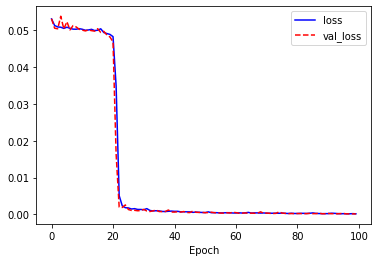

In [22]:
# 7.17 GRU 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [23]:
# 7.18 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

440/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.07839510226758394 	 0.08584788 	diff: 0.007452774698415668
0.8303927281041863 	 0.8206378 	diff: 0.009754905953002213
0.07150837353250081 	 0.068499036 	diff: 0.0030093373992114703
0.2140038693175733 	 0.21097559 	diff: 0.003028281949561812
0.7236034178656949 	 0.7176703 	diff: 0.005933096401156357
correctness: 98.18181818181819 %
